<a href="https://colab.research.google.com/github/jacobpad/Labs-Stuff/blob/master/Elon_Musk_twitter_followers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""FOR USE IN COLAB"""
# !pip install squarify
# !python -m spacy download en_core_web_lg

'FOR USE IN COLAB'

In [2]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [3]:
import pandas as pd


# Establish the URL
url = 'https://raw.githubusercontent.com/jacobpad/Labs-Stuff/master/elonmusk_followers%20(1).json'

# Read in data
df = pd.read_json(url, orient='index')
df = df.reset_index()
df = df.rename(columns={'index':'date_time', 0:'tweet'})

# View
df

,date_time,tweet
0,2009-12-09 17:53:34.369775616,This kid will forever be a legend 😂 https://t....
1,2009-12-01 11:19:37.461444609,"If you truly believe Lebrons mindset, competit..."
2,2009-11-26 03:37:33.637013507,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!
3,2009-12-21 06:38:15.388917763,@Bhuvan_Bam ❤️❤️
4,2009-09-04 21:32:08.857378816,I'm not crying you're crying.\nhttps://t.co/Bc...
...,...,...
9941,2009-12-13 04:08:20.573491200,@MirandaSleeper The offerings in that f-3 are ...
9942,2009-12-18 09:53:57.627150336,This will be the defining segment of “The Last...
9943,2009-12-20 14:22:19.864375297,"@frank_miskelly I don’t like it, I LOVE IT! Bu..."
9944,2009-12-20 11:50:26.459676672,Excited for my brother @Shufly10 as he embarks...


In [4]:
# Apply a first round of text cleaning techniques
import re
import string

'''
# def clean_text_round1(text):
#     """
#     Make text lowercase, remove text in square brackets, remove punctuation 
#     and remove words containing numbers.
#     """
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = re.sub('\n', '', text)
#     return text

# round1 = lambda x: clean_text_round1(x)

# Let's take a look at the updated text
# df['data_clean'] = pd.DataFrame(df['tweet'].apply(round1))
# df
'''

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens


In [5]:
# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Apply tokenizer
df['tokens'] = df['tweet'].apply(tokenize)

# View
print(df)

                         date_time  \
0    2009-12-09 17:53:34.369775616   
1    2009-12-01 11:19:37.461444609   
2    2009-11-26 03:37:33.637013507   
3    2009-12-21 06:38:15.388917763   
4    2009-09-04 21:32:08.857378816   
...                            ...   
9941 2009-12-13 04:08:20.573491200   
9942 2009-12-18 09:53:57.627150336   
9943 2009-12-20 14:22:19.864375297   
9944 2009-12-20 11:50:26.459676672   
9945 2009-12-20 04:55:37.291964416   

                                                  tweet  \
0     This kid will forever be a legend 😂 https://t....   
1     If you truly believe Lebrons mindset, competit...   
2       BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!   
3                                      @Bhuvan_Bam ❤️❤️   
4     I'm not crying you're crying.\nhttps://t.co/Bc...   
...                                                 ...   
9941  @MirandaSleeper The offerings in that f-3 are ...   
9942  This will be the defining segment of “The Last...   
9943  @frank

In [6]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens_count'] = df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 6928),
 ('to', 5415),
 ('a', 3943),
 ('and', 3517),
 ('of', 3154),
 ('is', 2759),
 ('in', 2722),
 ('you', 2355),
 ('for', 2163),
 ('i', 2107)]

In [7]:
# Count Function to count tokens
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [8]:
word_count_df = count(df['tokens'])
word_count_df

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,the,4112,6928,1.0,0.033863,0.033863,0.413433
26,to,3605,5415,2.0,0.026468,0.060331,0.362457
3,a,2872,3943,3.0,0.019273,0.079604,0.288759
126,and,2676,3517,4.0,0.017191,0.096795,0.269053
224,of,2374,3154,5.0,0.015416,0.112211,0.238689
...,...,...,...,...,...,...,...
34089,bigtime,1,1,34090.0,0.000005,0.999980,0.000101
34092,magee,1,1,34091.0,0.000005,0.999985,0.000101
34093,tpw,1,1,34092.0,0.000005,0.999990,0.000101
34090,atd,1,1,34093.0,0.000005,0.999995,0.000101


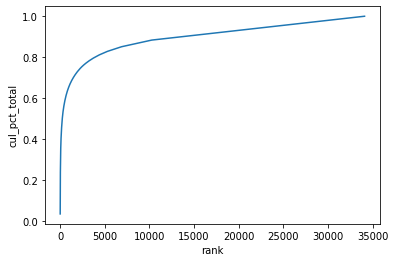

In [9]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=word_count_df);

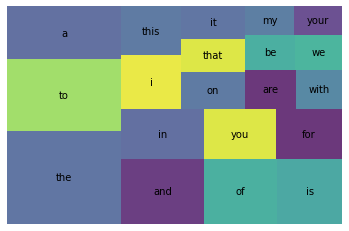

In [10]:
wc_top20 = word_count_df[word_count_df['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [11]:
df

,date_time,tweet,tokens,tokens_count
0,2009-12-09 17:53:34.369775616,This kid will forever be a legend 😂 https://t....,"[this, kid, will, forever, be, a, legend, http...",None
1,2009-12-01 11:19:37.461444609,"If you truly believe Lebrons mindset, competit...","[if, you, truly, believe, lebrons, mindset, co...",None
2,2009-11-26 03:37:33.637013507,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,"[buttlicker, our, prices, have, never, been, l...",None
3,2009-12-21 06:38:15.388917763,@Bhuvan_Bam ❤️❤️,[bhuvanbam],None
4,2009-09-04 21:32:08.857378816,I'm not crying you're crying.\nhttps://t.co/Bc...,"[im, not, crying, youre, cryinghttpstcobcfz6f0...",None
...,...,...,...,...
9941,2009-12-13 04:08:20.573491200,@MirandaSleeper The offerings in that f-3 are ...,"[mirandasleeper, the, offerings, in, that, f3,...",None
9942,2009-12-18 09:53:57.627150336,This will be the defining segment of “The Last...,"[this, will, be, the, defining, segment, of, t...",None
9943,2009-12-20 14:22:19.864375297,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","[frankmiskelly, i, dont, like, it, i, love, it...",None
9944,2009-12-20 11:50:26.459676672,Excited for my brother @Shufly10 as he embarks...,"[excited, for, my, brother, shufly10, as, he, ...",None


In [12]:
# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['hi','\n','\n\n', '&amp;', 'la',' ',
                                            'que', 'de', 'o', 'y', 'en', 'para',
                                            '.', 'el', 'un', 'los', 'le', 'por', 
                                            'un', 'el'])



In [13]:
tokens = []

for doc in tokenizer.pipe(df['tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
155,like,599,628,1.0,0.004924,0.004924,0.060225
540,-,333,582,2.0,0.004564,0.009488,0.033481
646,people,482,533,3.0,0.004179,0.013667,0.048462
714,new,323,352,4.0,0.002760,0.016428,0.032475
172,time,317,331,5.0,0.002595,0.019023,0.031872
56,know,274,296,6.0,0.002321,0.021344,0.027549
105,don’t,246,274,7.0,0.002149,0.023493,0.024734
175,think,261,272,8.0,0.002133,0.025626,0.026242
401,it’s,243,266,9.0,0.002086,0.027711,0.024432
448,want,244,263,10.0,0.002062,0.029774,0.024532


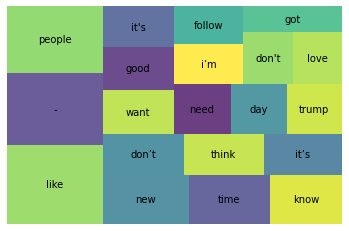

In [14]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


In [15]:
wcdf = wc.head(20)
wcdf['top_words'] = wcdf['word'].to_list()
wcdf

/Users/jacobpadgett/opt/anaconda3/envs/elon-tweets/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,top_words
155,like,599,628,1.0,0.004924,0.004924,0.060225,like
540,-,333,582,2.0,0.004564,0.009488,0.033481,-
646,people,482,533,3.0,0.004179,0.013667,0.048462,people
714,new,323,352,4.0,0.002760,0.016428,0.032475,new
172,time,317,331,5.0,0.002595,0.019023,0.031872,time
56,know,274,296,6.0,0.002321,0.021344,0.027549,know
105,don’t,246,274,7.0,0.002149,0.023493,0.024734,don’t
175,think,261,272,8.0,0.002133,0.025626,0.026242,think
401,it’s,243,266,9.0,0.002086,0.027711,0.024432,it’s
448,want,244,263,10.0,0.002062,0.029774,0.024532,want


In [35]:
import requests
import json


url = 'https://raw.githubusercontent.com/jacobpad/Labs-Stuff/master/elonmusk_followers%20(1).json'

r = requests.get(url)
df = r.json()
# df

In [36]:
df = pd.DataFrame(df.values())
col = ['original_tweet']
df = df.rename(columns={0:'original_tweet'})

df

,original_tweet
0,This kid will forever be a legend 😂 https://t....
1,"If you truly believe Lebrons mindset, competit..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!
3,@Bhuvan_Bam ❤️❤️
4,I'm not crying you're crying.\nhttps://t.co/Bc...
...,...
9941,@MirandaSleeper The offerings in that f-3 are ...
9942,This will be the defining segment of “The Last...
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu..."
9944,Excited for my brother @Shufly10 as he embarks...


In [37]:
# Emoji free text
# Source: https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

import emoji
def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

In [38]:
# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

In [39]:
df['emoji_free_tweet'] = df['original_tweet'].apply(call_emoji_free)
df

,original_tweet,emoji_free_tweet
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...
...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu..."
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...


In [40]:
# Tokenize function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [41]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Apply tokenizer
df['tokens'] = df['emoji_free_tweet'].apply(tokenize)

# View
df

,original_tweet,emoji_free_tweet,tokens
0,This kid will forever be a legend 😂 https://t....,This kid will forever be a legend https://t.co...,"[this, kid, will, forever, be, a, legend, http..."
1,"If you truly believe Lebrons mindset, competit...","If you truly believe Lebrons mindset, competit...","[if, you, truly, believe, lebrons, mindset, co..."
2,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,BUTTLICKER! OUR PRICES HAVE NEVER BEEN LOWER!!!,"[buttlicker, our, prices, have, never, been, l..."
3,@Bhuvan_Bam ❤️❤️,@Bhuvan_Bam,[bhuvanbam]
4,I'm not crying you're crying.\nhttps://t.co/Bc...,I'm not crying you're crying. https://t.co/BcF...,"[im, not, crying, youre, crying, httpstcobcfz6..."
...,...,...,...
9941,@MirandaSleeper The offerings in that f-3 are ...,@MirandaSleeper The offerings in that f-3 are ...,"[mirandasleeper, the, offerings, in, that, f3,..."
9942,This will be the defining segment of “The Last...,This will be the defining segment of “The Last...,"[this, will, be, the, defining, segment, of, t..."
9943,"@frank_miskelly I don’t like it, I LOVE IT! Bu...","@frank_miskelly I don’t like it, I LOVE IT! Bu...","[frankmiskelly, i, dont, like, it, i, love, it..."
9944,Excited for my brother @Shufly10 as he embarks...,Excited for my brother @Shufly10 as he embarks...,"[excited, for, my, brother, shufly10, as, he, ..."


In [ ]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens_count'] = df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)
--------
# Count Function to count tokens
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')
--------
word_count_df = count(df['tokens'])
word_count_df
--------
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=word_count_df);
--------
wc_top20 = word_count_df[word_count_df['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()
--------
# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['hi','\n','\n\n', '&amp;', 'la',' ',
                                            'que', 'de', 'o', 'y', 'en', 'para',
                                            '.', 'el', 'un', 'los', 'le', 'por', 
                                            'un', 'el'])
--------
tokens = []

for doc in tokenizer.pipe(df['tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)
tokens = []

for doc in tokenizer.pipe(df['tweet'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head(20)

--------
--------
--------
